# Baruch AIS: Workshop Series

### Lesson 1: Introduction  (1.5hr)   12:30 PM - 2PM

##### 1. Jupyter Online / Google Colab (10-15 min)
##### 2. Yahoo Finance (5 min)
##### 3. Importing Libraries (5-10 min)

In [1]:
#if issues running any of these make sure to install first with the command: 
# pip install pandas 
#pip install numpy 
# pip install matplotlib.pyplot

import pandas as pd     #everything else
import numpy as np        #calculations
import pandas_datareader as pdr       #pandas datareader to get stock data
from scipy import stats    # statistics
import datetime

In [2]:
#Make it interactive for user


symbolA= input("Enter Ticker Symbol for StockA: ")
symbolB= input("Enter Ticker Symbol for StockB: ")


#User enters the start date of stock analysis
date_entry = input('Enter a start date in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
start = datetime.date(year, month, day)

# User enters the end date of stock analysis
date_entry = input('Enter an end date in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
end = datetime.date(year, month, day)

Enter Ticker Symbol for StockA: TSLA
Enter Ticker Symbol for StockB: AAPL
Enter a start date in YYYY-MM-DD format: 2019-01-01
Enter an end date in YYYY-MM-DD format: 2020-01-01


In [3]:
## Import data from Yahoo
TSLA= pdr.DataReader(symbolA, 'yahoo', start, end)
AAPL= pdr.DataReader(symbolB, 'yahoo', start, end)

In [4]:
## Explore stocks

TSLA.head(10)   #first ten rows

TSLA.tail(10)    #last ten rows

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-17,77.099998,75.180000,75.797997,75.797997,42484000,75.797997
2019-12-18,79.043999,76.115997,76.125999,78.629997,70605000,78.629997
2019-12-19,81.370003,79.300003,79.463997,80.807999,90535500,80.807999
2019-12-20,82.599998,80.038002,82.057999,81.117996,73763500,81.117996
2019-12-23,84.402000,82.000000,82.356003,83.844002,66598000,83.844002
2019-12-24,85.094002,82.538002,83.671997,85.050003,40273500,85.050003
2019-12-26,86.695999,85.269997,85.582001,86.188004,53169500,86.188004
2019-12-27,87.061996,85.222000,87.000000,86.075996,49728500,86.075996
2019-12-30,85.800003,81.851997,85.758003,82.940002,62932000,82.940002


In [5]:
## only keep columns that you want to analyze

TSLA_= TSLA[["Adj Close"]]

In [6]:
# are there missing values?

TSLA_.isnull().sum()

Adj Close    0
dtype: int64

In [7]:
## Identify index and columns + rename a column

TSLA_.index
TSLA_.columns

TSLA_.rename(columns = {"Adj Close": "Adj_Close"}, inplace= True)

/Users/sandra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
TSLA_.head()

,Adj_Close
Date,
2019-01-02,62.023998
2019-01-03,60.071999
2019-01-04,63.537998
2019-01-07,66.991997
2019-01-08,67.070000


In [9]:
# Find the highest,lowest and mean value in Adj_Close

#TSLA_.Adj_Close.max()

#TSLA_.Adj_Close.min()

TSLA_.Adj_Close.max()

86.18800354003906

### Lesson 2: Statistical Analysis  12:30 PM - 2PM


Make sure to load the code above before continuing

In [12]:
# create df for AAPL with only the adjusted close

AAPL_ = AAPL[["Adj Close"]]
AAPL_.rename(columns ={"Adj Close": "Adj_Close"}, inplace= True)
AAPL_.head()


#min and max are self-explanatory
# count: how many values in this column

#25%: 75 % of data are higher than $46
# 50%: 50% of values are higher than $52 --> almost equal to mean
# 75%: only 25% of values are higher than $62

/Users/sandra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Adj_Close
Date,
2019-01-02,38.505024
2019-01-03,34.669640
2019-01-04,36.149662
2019-01-07,36.069202
2019-01-08,36.756794


### I. Trend Analysis

#### Question 1: Does my stock follow an upward/downward trend? 

##### Use Exponential Moving Average (EMA): puts more weight on the most recent price (weighted average)
Tips: useful for short-term traders, the shorter the period, the more sensitive to price changes

In [28]:
#ewm= exponential weighted moving average, span = number of days
#why should you use a function? because you have to repeat this process for each stock

def trend_analysis(df):
    df['Weighted_Moving_Average'] = df['Adj_Close'].ewm(span=50, adjust=False).mean()
    df['Moving Average'] = df["Adj_Close"].rolling(window= 1).mean()
    
    return df
    

In [29]:
trend_analysis(AAPL_)
trend_analysis(TSLA_)

<ipython-input-28-458f137edcf0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weighted_Moving_Average'] = df['Adj_Close'].ewm(span=50, adjust=False).mean()
<ipython-input-28-458f137edcf0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Moving Average'] = df["Adj_Close"].rolling(window= 1).mean()


,Adj_Close,Weighted_Moving_Average,Moving Average,Daily_Returns
Date,,,,
2019-01-02,62.023998,62.023998,62.023998,NaN
2019-01-03,60.071999,61.947449,60.071999,-0.031472
2019-01-04,63.537998,62.009824,63.537998,0.057697
2019-01-07,66.991997,62.205203,66.991997,0.054361
2019-01-08,67.070000,62.395979,67.070000,0.001164
...,...,...,...,...
2019-12-24,85.050003,67.460169,85.050003,0.014384
2019-12-26,86.188004,68.194594,86.188004,0.013380
2019-12-27,86.075996,68.895825,86.075996,-0.001300


In [30]:
TSLA_.describe()

,Adj_Close,Weighted_Moving_Average,Moving Average,Daily_Returns
count,252.000000,252.000000,252.000000,251.000000
mean,54.706040,53.930187,54.706040,0.001668
std,10.606053,7.156199,10.606053,0.030817
min,35.793999,45.279151,35.793999,-0.136137
25%,46.444001,46.796038,46.444001,-0.010541
50%,52.059000,53.527751,52.059000,0.002178
75%,62.382000,61.071462,62.382000,0.017576
max,86.188004,70.004202,86.188004,0.176692


In [31]:
#It seems like an upward trend but we will plot it later to assure
AAPL_

,Adj_Close,Weighted_Moving_Average,Moving Average,Daily_Returns
Date,,,,
2019-01-02,38.505024,38.505024,38.505024,NaN
2019-01-03,34.669640,38.354617,34.669640,-0.099607
2019-01-04,36.149662,38.268148,36.149662,0.042689
2019-01-07,36.069202,38.181915,36.069202,-0.002226
2019-01-08,36.756794,38.126028,36.756794,0.019063
...,...,...,...,...
2019-12-24,70.353882,64.441947,70.353882,0.000951
2019-12-26,71.749733,64.728527,71.749733,0.019840
2019-12-27,71.722488,65.002800,71.722488,-0.000380


### II. Risk Analysis

#### Question 2: How risky is my stock? 

In [32]:
TSLA_.Adj_Close.std()

10.60605338485959

In [33]:
#Create a function that compares the calculates the standard deviation and returns which stock has a higher risk

def risk_analysis(df1, df2):
    std_SymbolA= df1.Adj_Close.std()
    std_SymbolB= df2.Adj_Close.std()
    
    if std_SymbolA > std_SymbolB:
        print ("Tesla Stock is riskier than Apple Stock!")
    else:
        print ("Apple Stock is riskier than Tesla Stock!") 

In [34]:
risk_analysis(TSLA_, AAPL_)

Tesla Stock is riskier than Apple Stock!


### III. Return Analysis

Daily Returns Tesla and Apple

In [35]:
def daily_return_analysis(df):
    df["Daily_Returns"]= df['Adj_Close'].pct_change()
    
    return df
    

In [36]:
daily_return_analysis(TSLA_)
daily_return_analysis(AAPL_)

<ipython-input-35-ebd28f4e150d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Daily_Returns"]= df['Adj_Close'].pct_change()


,Adj_Close,Weighted_Moving_Average,Moving Average,Daily_Returns
Date,,,,
2019-01-02,38.505024,38.505024,38.505024,NaN
2019-01-03,34.669640,38.354617,34.669640,-0.099607
2019-01-04,36.149662,38.268148,36.149662,0.042689
2019-01-07,36.069202,38.181915,36.069202,-0.002226
2019-01-08,36.756794,38.126028,36.756794,0.019063
...,...,...,...,...
2019-12-24,70.353882,64.441947,70.353882,0.000951
2019-12-26,71.749733,64.728527,71.749733,0.019840
2019-12-27,71.722488,65.002800,71.722488,-0.000380


In [37]:
TSLA_Monthly_Returns= AAPL_["Adj_Close"].resample('M').ffill().pct_change()[1:]

AAPL_Monthly_Returns= AAPL_["Adj_Close"].resample('M').ffill().pct_change()[1:]


In [62]:
TSLA_Monthly_Returns

dtype('float64')

In [39]:
#Records were reduced by a lot --> monthly 
print (TSLA_Monthly_Returns.shape)
print (AAPL_Monthly_Returns.shape)

(11,)
(11,)


#### Thank you for attending :)

### Part III: Data Visualization 12:30-2PM

In [40]:
#Data Visualization
%matplotlib inline 
#if not included must always use plt.show()

import matplotlib.pyplot as plt    
from matplotlib import style


#### 1. Plot Trend Analysis

In [79]:
def plot_trend(df):
    plt.style.use('ggplot')

#The size for our chart
    plt.figure(figsize = (12,6))

#Plotting price and SMA lines
    plt.plot(df['Weighted_Moving_Average'], label='Weighted_Moving_Average',linestyle='--', linewidth = 2)
    plt.plot(df['Moving Average'], label='Moving_Average',linestyle='-.', linewidth = 2)

#Adding title and labeles on the axes, making legend visible
    plt.xlabel('Date')
    plt.ylabel('Adjusted closing price ($)')
    plt.title('Trend Analysis')
    plt.legend()
    plt.show()

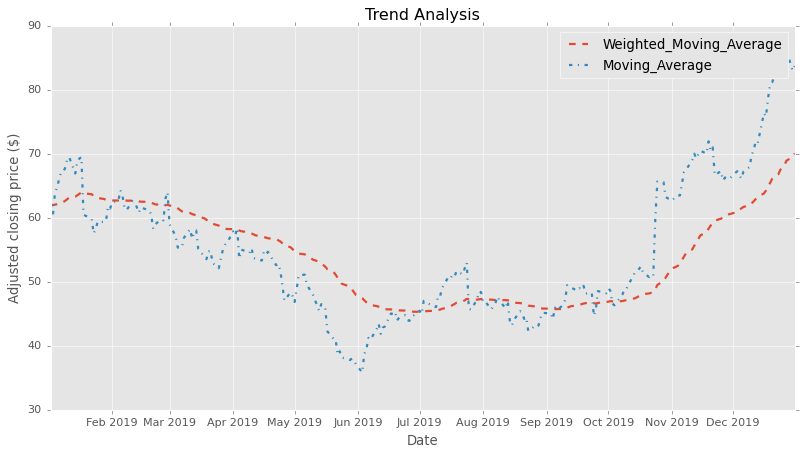

In [81]:
plot_trend(TSLA_)

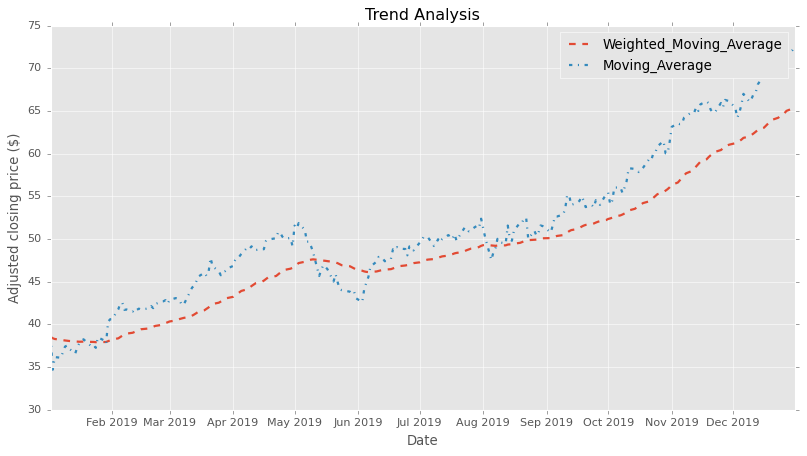

In [82]:
plot_trend(AAPL_)

####  2. Plot Daily Returns

In [58]:
def plot_daily_returns(df1,df2):
    plt.style.use('ggplot')

#The size for our chart
    plt.figure(figsize = (12,6))

#Plotting price and SMA lines
    plt.plot(df1['Daily_Returns'], label='Daily Returns TSLA',linestyle='--', linewidth = 2, color= 'r')
    plt.plot(df2['Daily_Returns'], label='Daily Returns AAPL',linestyle='-', linewidth = 2, color = 'b')


#Adding title and labeles on the axes, making legend visible
    plt.xlabel('Date')
    plt.ylabel('Daily Returns ($)')
    plt.title('Daily Return Analysis')
    plt.legend()
    plt.show()

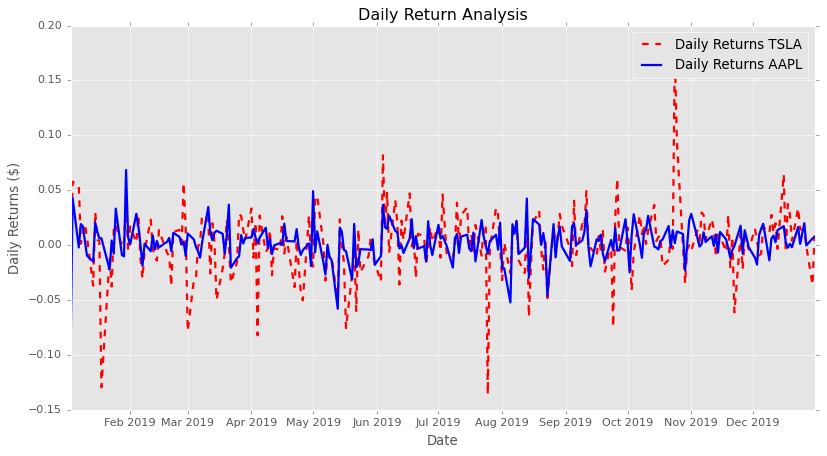

In [59]:
plot_daily_returns(TSLA_, AAPL_)

#### 3. Plot Monthly Returns

In [75]:
def plot_monthly_returns(df1,df2):
    plt.style.use('ggplot')

#The size for our chart
    plt.figure(figsize = (12,6))

#Plotting price and SMA lines
    plt.plot(df1["Adj_Close"].resample('M').ffill().pct_change()[1:],label='Monthly Returns TSLA',linestyle='--', linewidth = 2, color= 'r')
    plt.plot(df2["Adj_Close"].resample('M').ffill().pct_change()[1:],label='Monthly Returns AAPL',linestyle='-', linewidth = 2, color= 'b')
   
#Adding title and labeles on the axes, making legend visible
    plt.xlabel('Date')
    plt.ylabel('Monthly Returns ($)')
    plt.title('Monthly Return Analysis')
    plt.legend()
    plt.show()

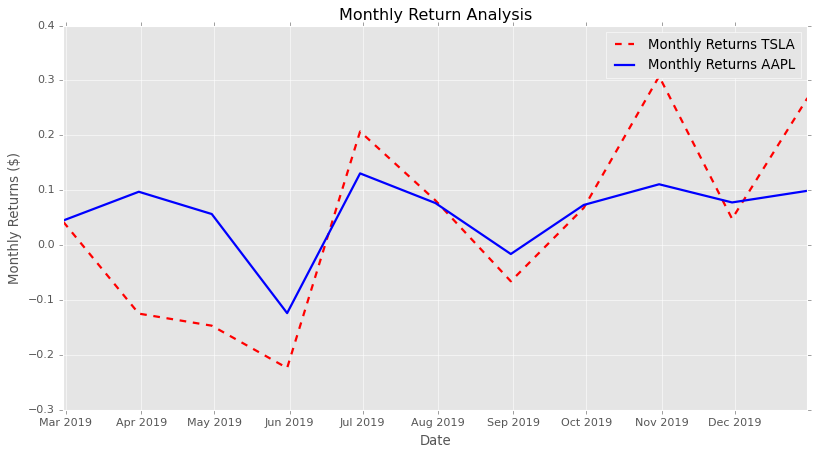

In [76]:
plot_monthly_returns (TSLA_, AAPL_)